In [78]:
import keras
import pandas as pd

from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import load_model, Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [79]:
import numpy as np
from keras.utils import to_categorical

In [80]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
model = keras.models.load_model('cancer1.model')

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
activation_9 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 9, 9, 64)          256       
__________

In [83]:
data = pd.read_csv('hmnist_28_28_RGB.csv')

In [84]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [85]:
cancer_dict = {
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions ',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Vascular lesions',
    6: 'Melanoma',   
}

In [86]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
def changeinput(X):
    
    X = np.array(X)
    X = X.reshape(X.shape[0],28,28,3)
    X =  X.astype('float64') / 255.0
    return X

def changeoutput(Y):
    
    Y = np.array(Y)
    Y = to_categorical(Y)
    return Y  

In [87]:
X=changeinput(X)
Y=changeoutput(Y)


In [88]:
pred = model.predict(X)
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
pred_rounded=np.round(pred, 0)

In [90]:
pred_rounded[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [91]:
print("Prediction accuracy = : ",accuracy_score(y_true= Y, y_pred = pred_rounded) )

Prediction accuracy = :  0.945681477783325


In [92]:
a= confusion_matrix(y_true= Y.argmax(axis=1), y_pred = pred_rounded.argmax(axis=1))
a = a / a.astype(np.float).sum(axis=1)

In [93]:
df = pd.DataFrame(a, index = [cancer_dict[i] for i in cancer_dict],
                  columns = [cancer_dict[i] for i in cancer_dict])



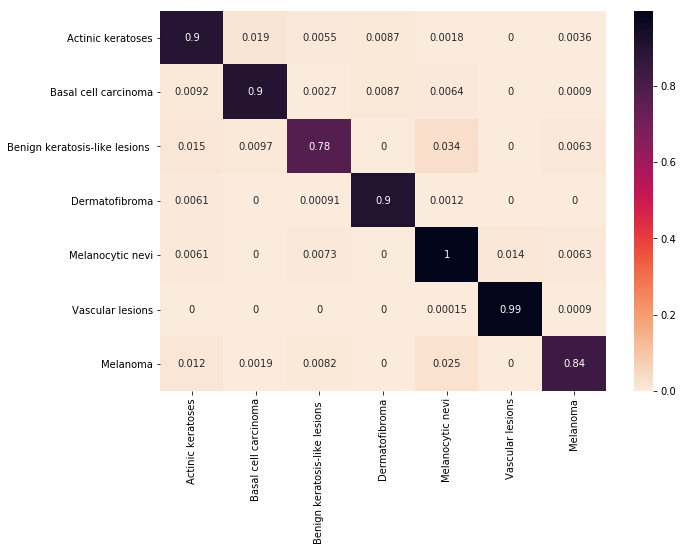

In [94]:
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True,cmap = sn.cm.rocket_r)

In [95]:
df2 = pd.read_csv('HAM10000_metadata.csv')

In [96]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df2['cell_type'] = df2['dx'].map(lesion_type_dict.get) 

In [97]:
df2.groupby('cell_type')['image_id'].nunique()

cell_type
Actinic keratoses                  327
Basal cell carcinoma               514
Benign keratosis-like lesions     1099
Dermatofibroma                     115
Melanocytic nevi                  6705
Melanoma                          1113
Vascular lesions                   142
Name: image_id, dtype: int64

In [98]:
df2.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


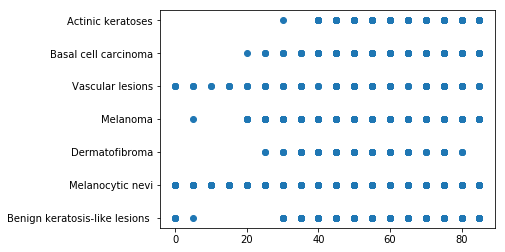

In [99]:
plt.scatter(df2['age'],df2['cell_type'])

In [103]:
import seaborn as sns


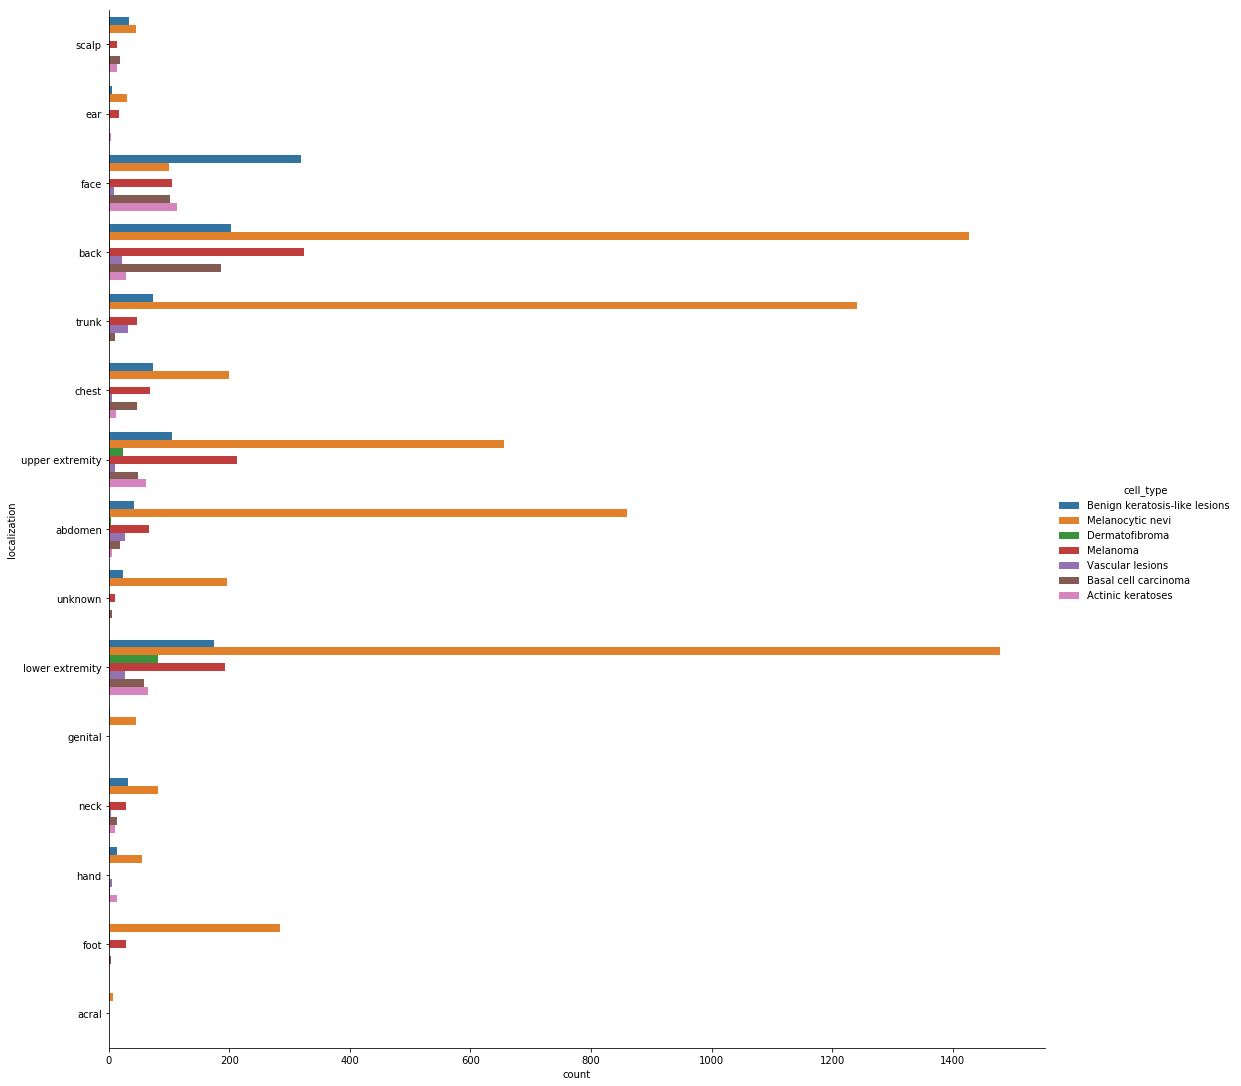

In [102]:
sns.catplot(y='localization', data=df2, kind='count', hue='cell_type', height=15, orient='v')